# Model for time series forecasting: ARIMA

*Apr 5, 2021 14:23*

# 1. Import the data

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(f"{plt.style.available[-2]}")
plt.rcParams.update({"font.size": 14, "axes.labelweight": "bold", "figure.figsize": (20,8), "lines.linewidth": 2})

bank = pd.read_csv('data/ChinaBank.csv', index_col=1, parse_dates=True)
bank

,Unnamed: 0,Open,High,Low,Close,Volume
Date,,,,,,
2014-01-02,1,2.62,2.62,2.59,2.61,41632500
2014-01-03,2,2.60,2.61,2.56,2.56,45517700
2014-01-06,3,2.57,2.57,2.50,2.53,68674700
2014-01-07,4,2.51,2.52,2.49,2.52,53293800
2014-01-08,5,2.51,2.54,2.49,2.51,69087900
...,...,...,...,...,...,...
2015-04-24,341,4.71,4.73,4.60,4.66,1619024500
2015-04-27,342,4.66,4.82,4.66,4.81,1841766000
2015-04-28,343,4.83,5.29,4.81,5.06,4017962400


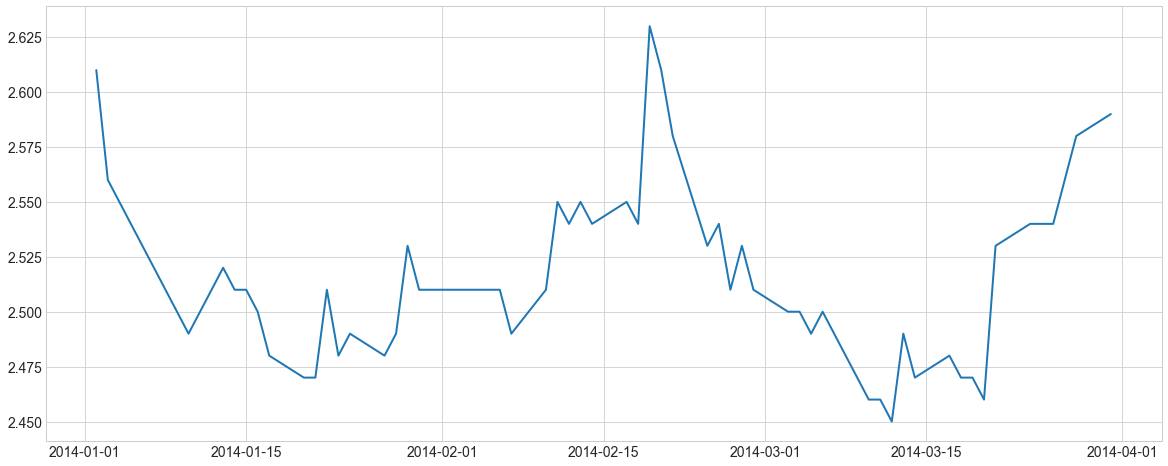

In [2]:
sub = bank['2014-01':'2014-06'].Close

train = sub.loc['2014-01':'2014-03']
test = sub.loc['2014-04': '2014-06']

plt.plot(train)
plt.show()

# 2.
## 2.1 Stability

## 2.2 

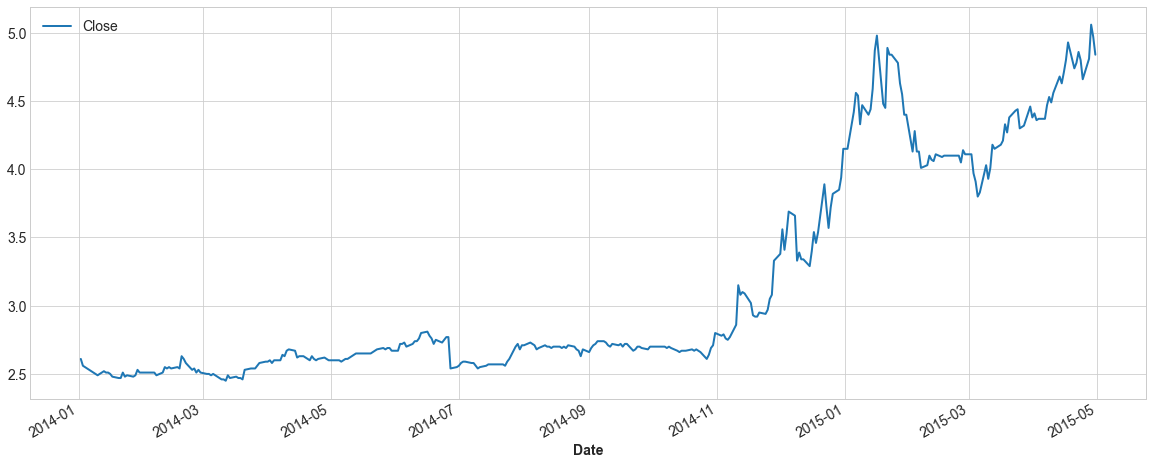

In [3]:
train
# 2014.1-2014.3

bank[['Close']].plot.line()
# till 2014.11 the trend is relatively stable and we will look into this range.
plt.show()

- We only look till 2014 November, where the trend is relatively stable between 2.5 to 3.0.

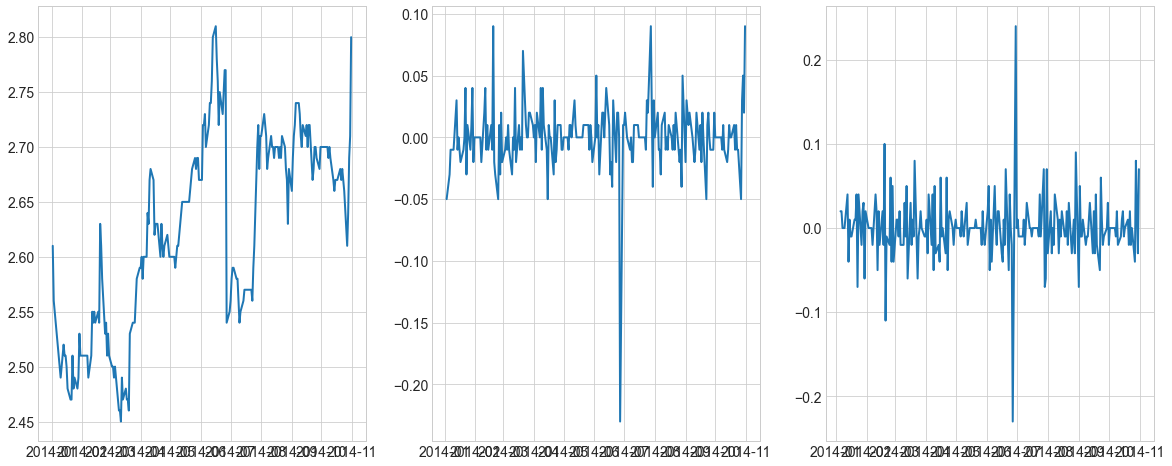

In [4]:
bank['close_diff_1'] = bank.Close.diff(1)
bank['close_diff_2'] = bank.close_diff_1.diff(1)
fig = plt.figure()
ax1 = fig.add_subplot(131)
ax1.plot(bank[: '2014-10'].Close)


ax2 = fig.add_subplot(132)
ax2.plot(bank[: '2014-10'].close_diff_1)

ax3 = fig.add_subplot(133)
ax3.plot(bank[: '2014-10'].close_diff_2)

plt.show()

In [5]:
bank.head(11)

,Unnamed: 0,Open,High,Low,Close,Volume,close_diff_1,close_diff_2
Date,,,,,,,,
2014-01-02,1,2.62,2.62,2.59,2.61,41632500,NaN,NaN
2014-01-03,2,2.60,2.61,2.56,2.56,45517700,-0.05,NaN
2014-01-06,3,2.57,2.57,2.50,2.53,68674700,-0.03,2.000000e-02
2014-01-07,4,2.51,2.52,2.49,2.52,53293800,-0.01,2.000000e-02
2014-01-08,5,2.51,2.54,2.49,2.51,69087900,-0.01,-4.440892e-16
2014-01-09,6,2.51,2.53,2.49,2.50,45339800,-0.01,4.440892e-16
2014-01-10,7,2.50,2.51,2.49,2.49,41009000,-0.01,0.000000e+00
2014-01-13,8,2.50,2.52,2.50,2.52,29469300,0.03,4.000000e-02
2014-01-14,9,2.51,2.52,2.50,2.51,30626300,-0.01,-4.000000e-02


# 3. ARIMA model
## 3.1 

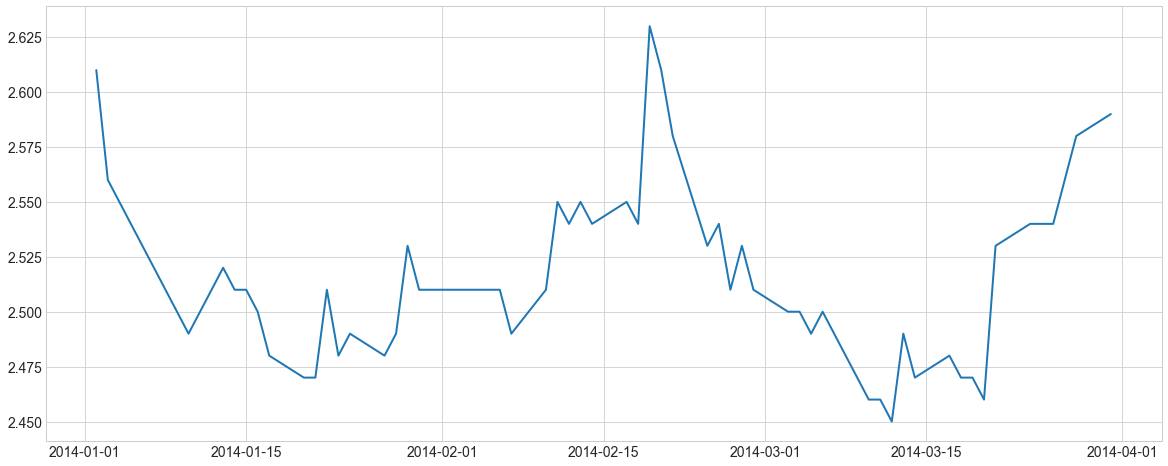

In [6]:
plt.plot(train)

In [7]:
train

Date
2014-01-02    2.61
2014-01-03    2.56
2014-01-06    2.53
2014-01-07    2.52
2014-01-08    2.51
              ... 
2014-03-25    2.54
2014-03-26    2.54
2014-03-27    2.56
2014-03-28    2.58
2014-03-31    2.59
Name: Close, Length: 62, dtype: float64

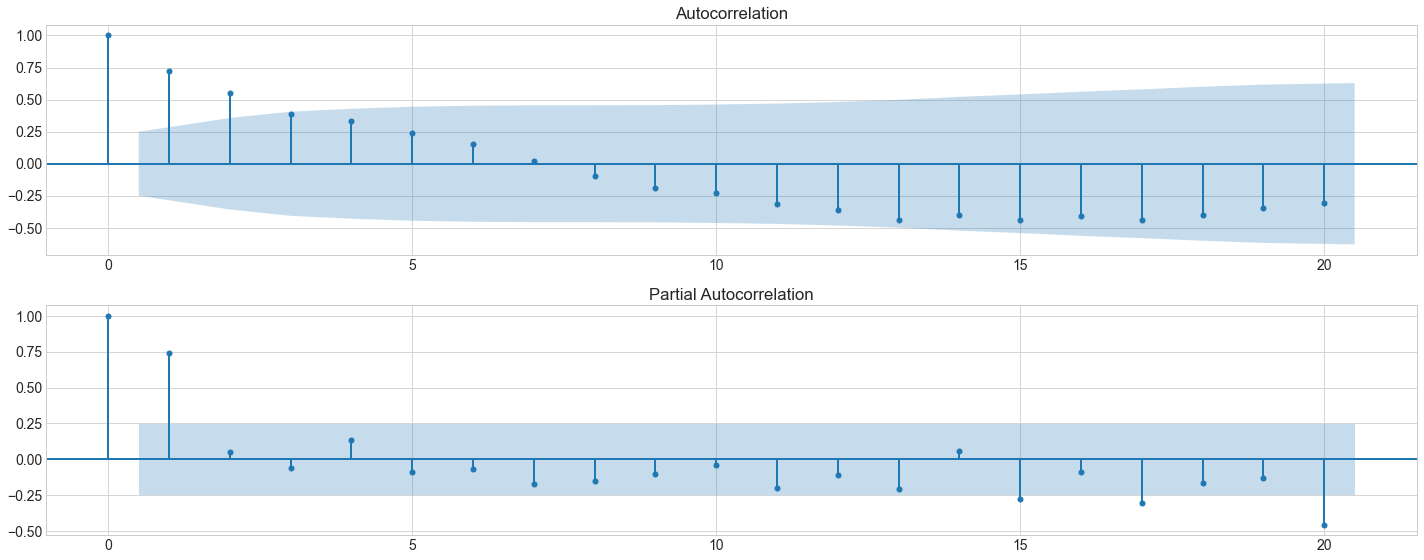

In [12]:
### import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels as sm

fig = plt.figure()

ax1 = fig.add_subplot(211)
fig = plot_acf(train, lags=20, ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout()

ax2 = fig.add_subplot(212)
fig = plot_pacf(train, lags=20, ax=ax2)
fig.tight_layout()
plt.show()

In [9]:
# what can we tell from acf and pacf??

In [157]:
randrange(33)

24

In [175]:
# to understand ACF
from random import randrange

def generateData(startDate, endDate):
    df = pd.DataFrame([300+i*30+randrange(2000) for i in range(336)],\
                     columns=['sales'],\
                     index=pd.date_range(startDate, endDate, freq='D'))
    return df

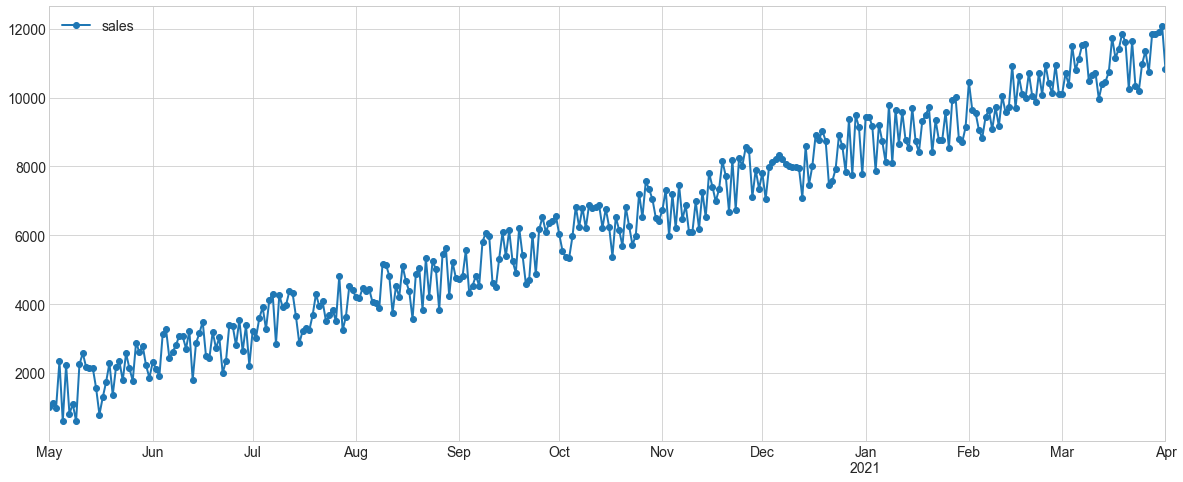

In [187]:
data = generateData('20200501', '20210401')
data.plot.line(marker='o')
plt.show()

In [177]:
n = len(data)
round(n*.75)

252

In [178]:
for lag in [round(n*.25), round(n*.5), round(n*.75)]:
    data[f"lag={lag}"] = data.sales.shift(lag)
data

,sales,lag=84,lag=168,lag=252
2020-05-01,1828,NaN,NaN,NaN
2020-05-02,1054,NaN,NaN,NaN
2020-05-03,1619,NaN,NaN,NaN
2020-05-04,1514,NaN,NaN,NaN
2020-05-05,2257,NaN,NaN,NaN
...,...,...,...,...
2021-03-28,11003,9355.0,5349.0,2983.0
2021-03-29,10873,9735.0,6863.0,2912.0
2021-03-30,11176,8253.0,6995.0,4408.0
2021-03-31,12049,9706.0,6009.0,3601.0


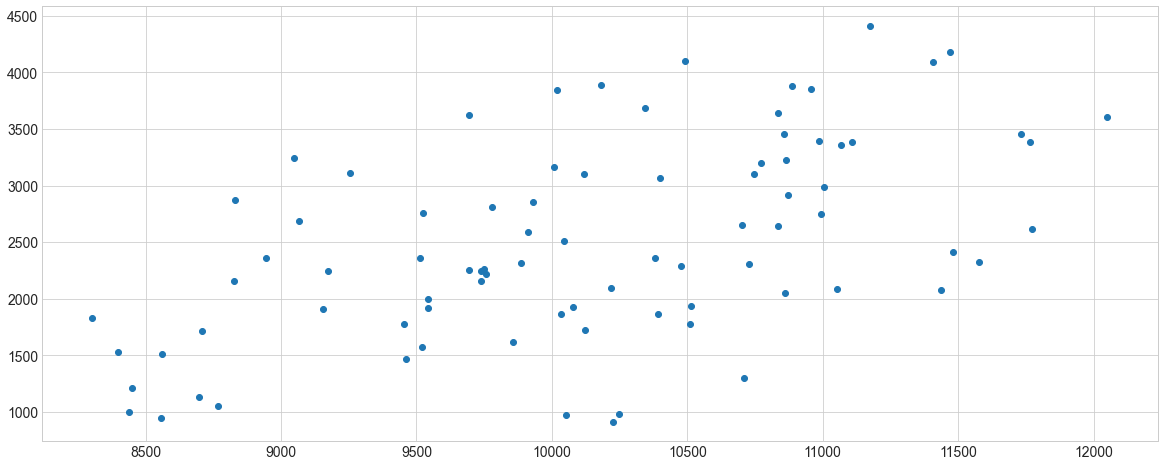

In [179]:
plt.scatter(data.iloc[:, 0], data.iloc[:, -1])
plt.show()

In [181]:
data.iloc[:, 0].corr(data.iloc[:, -1])

0.5389896647996221

In [188]:
data.sales.autocorr(200)

0.8253698343610137

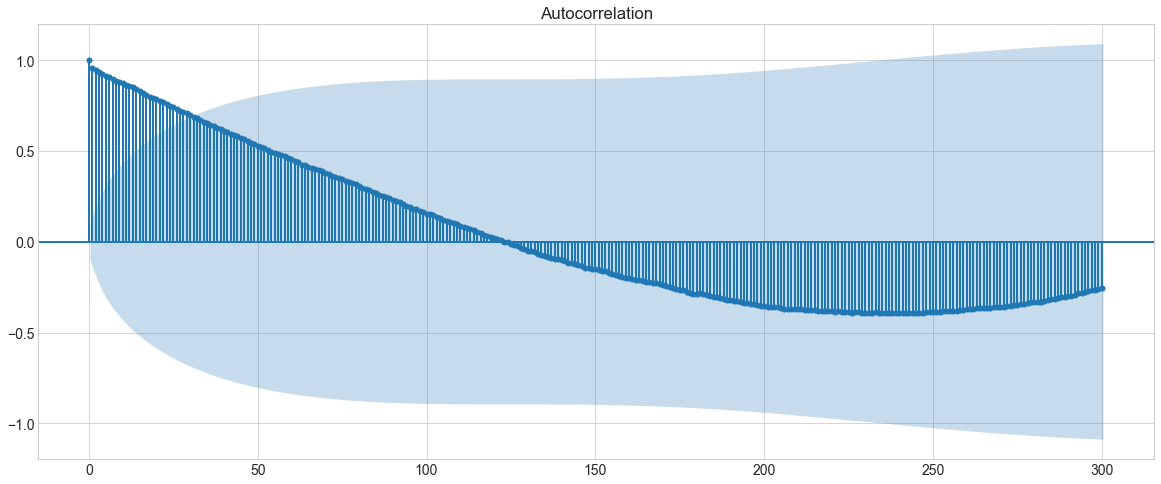

In [189]:
fig = plot_acf(data.sales, lags=300)
plt.show()
# why is there neg AC??

C:\Users\dengj\Miniconda3\envs\mds574\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """Entry point for launching an IPython kernel.


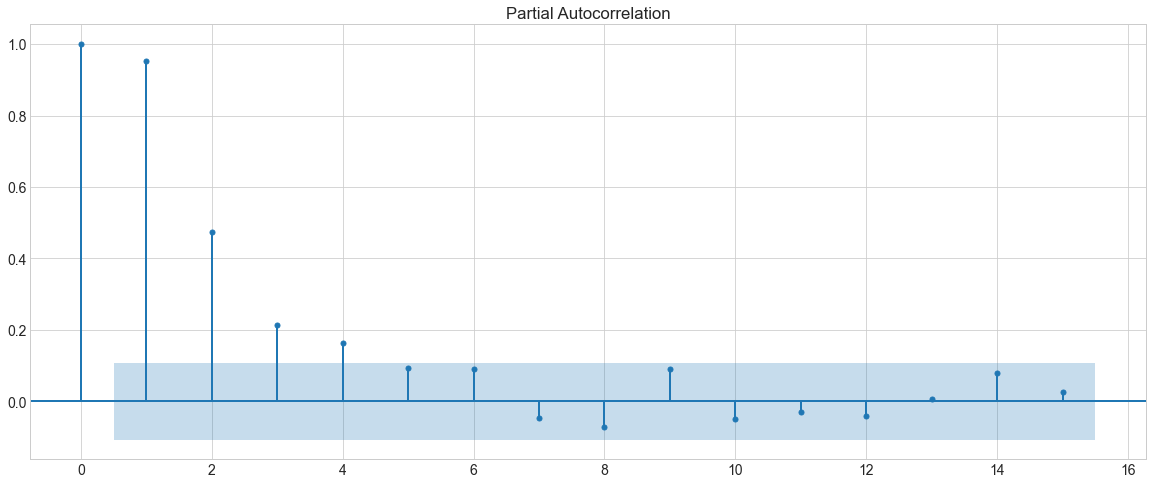

In [183]:
plot_pacf(data.iloc[:, 0], lags=15).show()

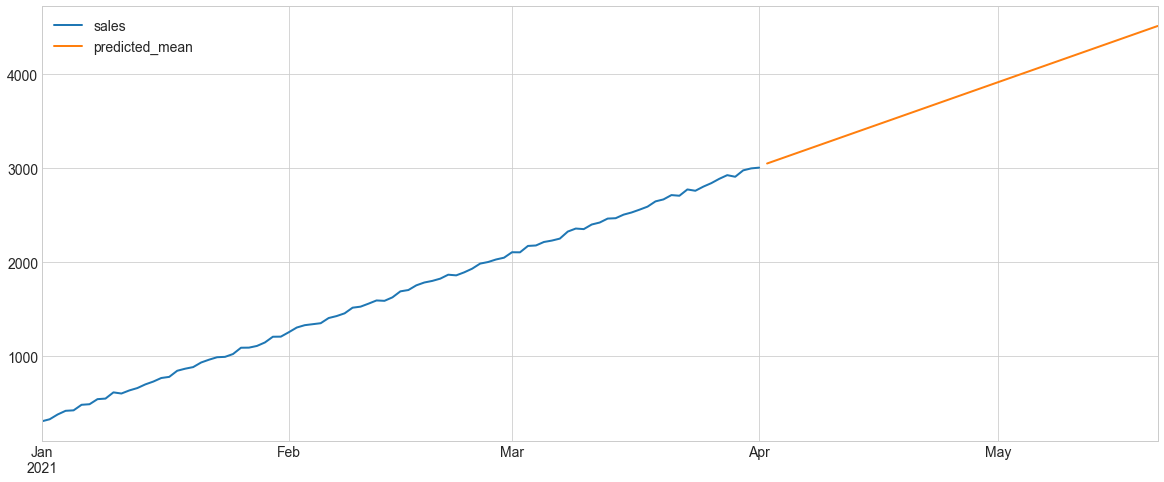

In [128]:
from statsmodels.tsa.arima.model import ARIMA


model_arima = ARIMA(data["sales"], order=(1, 1, 2)).fit()
fcast = model_arima.forecast(50)
df_pred = pd.concat((data.sales, fcast), axis=1)
df_pred.plot.line()
df_pred;